In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carrega o arquivo no modo lazy (não executa imediatamente)
lazy_df = pl.scan_parquet("202501_NovoBolsaFamilia_polars.parquet")

In [3]:
# Mostra o esquema (tipos de dados atuais)
lazy_df.collect_schema()

Schema([('MÊS COMPETÊNCIA', Int64),
        ('MÊS REFERÊNCIA', Int64),
        ('UF', String),
        ('CÓDIGO MUNICÍPIO SIAFI', Int64),
        ('NOME MUNICÍPIO', String),
        ('CPF FAVORECIDO', String),
        ('NIS FAVORECIDO', Int64),
        ('NOME FAVORECIDO', String),
        ('VALOR PARCELA', String)])

In [4]:
# Converte VALOR PARCELA de str para float (substitui ',' por '.')
# Converte MÊS REFERÊNCIA de int (ex: 202501) para datetime
processed_df = (
    lazy_df
    .with_columns(
        pl.col("VALOR PARCELA").str.replace(",", ".").cast(pl.Float64).alias("VALOR PARCELA"),
        pl.col("MÊS REFERÊNCIA").cast(pl.String).str.strptime(pl.Date, "%Y%m").alias("DATA REFERÊNCIA")
    )
).collect()
# Executa as operações lazy
print(processed_df.head())

shape: (5, 10)
┌────────────┬────────────┬─────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ MÊS COMPET ┆ MÊS        ┆ UF  ┆ CÓDIGO     ┆ … ┆ NIS        ┆ NOME       ┆ VALOR     ┆ DATA REFE │
│ ÊNCIA      ┆ REFERÊNCIA ┆ --- ┆ MUNICÍPIO  ┆   ┆ FAVORECIDO ┆ FAVORECIDO ┆ PARCELA   ┆ RÊNCIA    │
│ ---        ┆ ---        ┆ str ┆ SIAFI      ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│ i64        ┆ i64        ┆     ┆ ---        ┆   ┆ i64        ┆ str        ┆ f64       ┆ date      │
│            ┆            ┆     ┆ i64        ┆   ┆            ┆            ┆           ┆           │
╞════════════╪════════════╪═════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 202501     ┆ 202308     ┆ SP  ┆ 7071       ┆ … ┆ 2064389044 ┆ FERNANDA   ┆ 650.0     ┆ 2023-08-0 │
│            ┆            ┆     ┆            ┆   ┆ 5          ┆ RAMOS      ┆           ┆ 1         │
│            ┆            ┆     ┆            ┆   ┆            ┆ TEIXEIRA   ┆

In [5]:
# Frequência de valores por UF
freq_uf = processed_df["UF"].value_counts().sort("count", descending=True)
print(freq_uf.head(27))

shape: (27, 2)
┌─────┬─────────┐
│ UF  ┆ count   │
│ --- ┆ ---     │
│ str ┆ u32     │
╞═════╪═════════╡
│ BA  ┆ 4919884 │
│ SP  ┆ 4892129 │
│ PE  ┆ 3157786 │
│ RJ  ┆ 3137344 │
│ MG  ┆ 3119226 │
│ …   ┆ …       │
│ TO  ┆ 309062  │
│ RO  ┆ 264180  │
│ AC  ┆ 261752  │
│ AP  ┆ 242729  │
│ RR  ┆ 158597  │
└─────┴─────────┘


In [6]:
#Moda do valor da parcela (valor mais comum)
moda_valor = processed_df["VALOR PARCELA"].mode()
print(f"Moda do valor da parcela: {moda_valor}")

Moda do valor da parcela: shape: (1,)
Series: 'VALOR PARCELA' [f64]
[
	600.0
]


KeyboardInterrupt: 

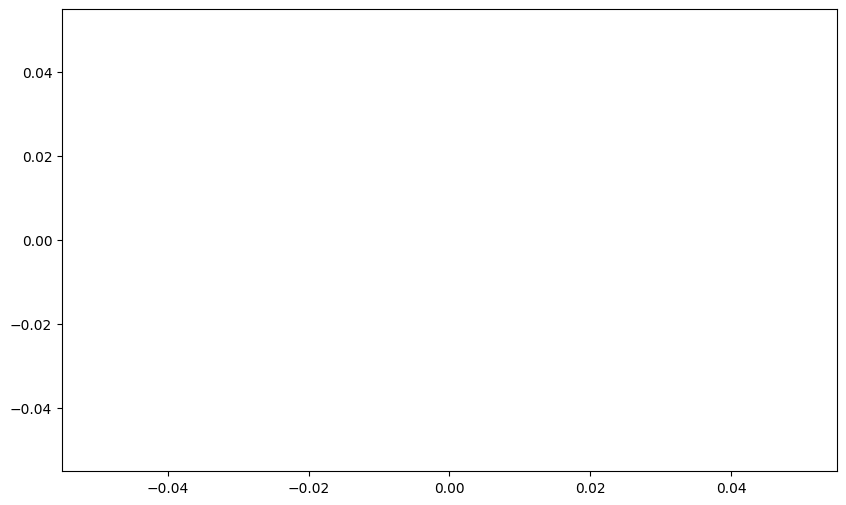

In [10]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))
sns.histplot(processed_df["VALOR PARCELA"].to_numpy(), bins=30, kde=True)
plt.title("Distribuição dos Valores das Parcelas")
plt.xlabel("Valor (R$)")
plt.ylabel("Frequência")
plt.show()

In [ ]:
'''
Quais são as 3 UFs (Estados) com o menor número de beneficiários de acordo com a análise de frequência?
Além da moda, o histograma pode nos dar uma ideia da dispersão dos valores.
Qual é aproximadamente a faixa de valores que abrange a maioria dos beneficiários (a "barriga" principal do histograma)?
Você consegue identificar visualmente se há beneficiários recebendo valores muito mais altos do que a maioria (possíveis outliers)?
3 UFs com o menor número de beneficiários: Execute a célula que calcula e imprime freq_uf. A tabela resultante já está ordenada descendentemente.
Para encontrar as UFs com o menor número, você precisará olhar as últimas linhas da saída.
'''

In [7]:
freq_uf_min = processed_df["UF"].value_counts().sort("count", descending=False)
print(freq_uf_min.head(3))

shape: (3, 2)
┌─────┬────────┐
│ UF  ┆ count  │
│ --- ┆ ---    │
│ str ┆ u32    │
╞═════╪════════╡
│ RR  ┆ 158597 │
│ AP  ┆ 242729 │
│ AC  ┆ 261752 │
└─────┴────────┘


In [ ]:
#gráfico de frequencia

plt.figure(figsize=(12, 8)) # Ajusta o tamanho da figura para acomodar mais barras

# Calcula as contagens e ordena por contagem decrescente
uf_counts = processed_df["UF"].value_counts().sort("count", descending=True)

# Extrai a coluna 'UF' (que contém os estados) do DataFrame de contagens para usar como ordem
uf_order = uf_counts["UF"].to_list()

sns.countplot(data=processed_df, y="UF", order=uf_order, palette="viridis")
plt.title("Número de Beneficiários por Estado (UF)")
plt.xlabel("Número de Beneficiários")
plt.ylabel("Estado (UF)")
plt.show()

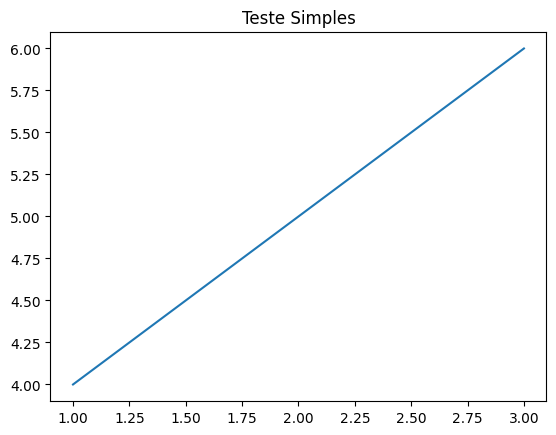

In [9]:
#gráfico mais simples pra teste

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Teste Simples")
plt.show()